In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../..')
from gp2 import Runner

In [3]:

R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 KUnet ***
Working directory: /tmp/tmpmupkr11oGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_img.npy')
masks = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_mask.npy')

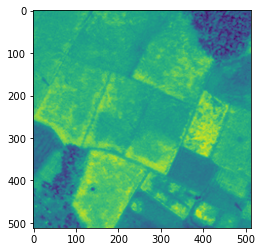

In [5]:
plt.imshow(images[500])

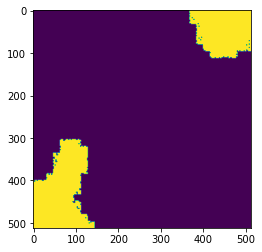

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

5108

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
4/4 [==============================] - 23s 4s/step - loss: 0.9654 - dice_coeff: 0.5156 - val_loss: 0.6909 - val_dice_coeff: 0.5721
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.9352 - dice_coeff: 0.5232 - val_loss: 0.6955 - val_dice_coeff: 0.5629
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.8857 - dice_coeff: 0.5349 - val_loss: 0.7001 - val_dice_coeff: 0.5548
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.8409 - dice_coeff: 0.5474 - val_loss: 0.7032 - val_dice_coeff: 0.5484
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.7952 - dice_coeff: 0.5590 - val_loss: 0.7059 - val_dice_coeff: 0.5430
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 0.7994 - dice_coeff: 0.5597 - val_loss: 0.7095 - val_dice_coeff: 0.5379
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.7691 - dice_coeff: 0.5698 - val_loss: 0.7140 - va

In [12]:
R.classifier_scores

[[1.3129265308380127, 0.464781254529953],
 [1.4755403995513916, 0.4176238477230072],
 [1.2451164722442627, 0.5353299975395203],
 [2.7810826301574707, 0.11136072129011154],
 [2.6770594120025635, 0.1258223056793213]]

In [13]:
R.discriminator_scores

[[6.73274547224878e-09, 1.0],
 [0.0005182632594369352, 1.0],
 [64.86195373535156, 0.49501660466194153],
 [1.083004235624685e-06, 1.0],
 [3.683190996639496e-08, 1.0]]

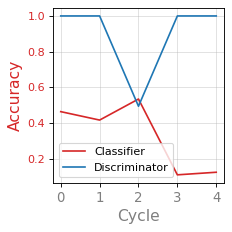

In [14]:
R.plot()